In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import uuid

In [2]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
        the root will be found and used
    - if the tree is directed and this is given, then 
        the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
        then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

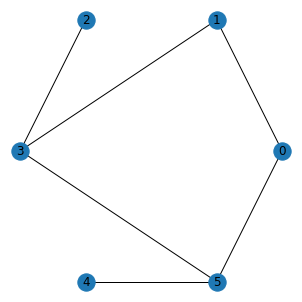

In [21]:
g=nx.watts_strogatz_graph(n=6, k=2, p=0.6)
plt.figure(figsize=(4,4))
nx.draw_circular(g, with_labels = True)

In [22]:
s = 0 ; d = 1

paths = nx.all_simple_paths(g, s, d)

list_paths = list(paths)

for path_index, path in enumerate(nx.all_simple_paths(g, s, d)):
    print(f"{path_index} {path}")

0 [0, 1]
1 [0, 5, 3, 1]


In [23]:
list_paths_levels = [[f'{j}_level{lev}' for lev,j in enumerate(i, 1)] for i in list_paths]

for path in list_paths_levels:
    print(path)

['0_level1', '1_level2']
['0_level1', '5_level2', '3_level3', '1_level4']


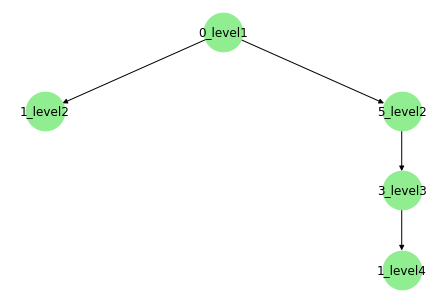

In [26]:
H = nx.DiGraph()
for path in list_paths_levels:
    nx.add_path(H, path)

pos = hierarchy_pos(H)    
nx.draw(H, 
        pos=pos, 
        node_color='lightgreen', 
        node_size=1500,
        with_labels=True, 
        arrows=True)
#plt.savefig('hierarchy.png')

In [17]:
G = nx.DiGraph()

for path_index, path in enumerate(paths):
    print(f"{path_index} {path}")
    node_id = uuid.uuid4()
    G.add_node(node_id, name='hej')
    G.add_edge(node_id, 2)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
print(G.nodes.data())

Nodes: 0, Edges: 0
